In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | santa rosa
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | kawalu
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | volkhov
Processing Record 10 of Set 1 | talcahuano
Processing Record 11 of Set 1 | sola
Processing Record 12 of Set 1 | yarmouth
Processing Record 13 of Set 1 | hays
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | quang ngai
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | guymon
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | paamiut
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set 1 | ilulissat
Pr

Processing Record 40 of Set 4 | poronaysk
Processing Record 41 of Set 4 | constitucion
Processing Record 42 of Set 4 | usevya
Processing Record 43 of Set 4 | belem de sao francisco
Processing Record 44 of Set 4 | taksimo
Processing Record 45 of Set 4 | jalu
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | pierre
Processing Record 50 of Set 4 | mayumba
Processing Record 1 of Set 5 | high level
Processing Record 2 of Set 5 | faya
Processing Record 3 of Set 5 | ribeira brava
Processing Record 4 of Set 5 | ascope
Processing Record 5 of Set 5 | strezhevoy
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Processing Record 7 of Set 5 | galesong
Processing Record 8 of Set 5 | marawi
Processing Record 9 of Set 5 | sao francisco
Processing Record 10 of Set 5 | linxi
Processing Record 11 of Set 

Processing Record 27 of Set 8 | baruun-urt
Processing Record 28 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 29 of Set 8 | dire dawa
Processing Record 30 of Set 8 | abu dhabi
Processing Record 31 of Set 8 | carora
Processing Record 32 of Set 8 | billings
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | indramayu
Processing Record 35 of Set 8 | conceicao do araguaia
Processing Record 36 of Set 8 | chilliwack
Processing Record 37 of Set 8 | tilichiki
Processing Record 38 of Set 8 | morant bay
Processing Record 39 of Set 8 | jiuquan
Processing Record 40 of Set 8 | simpang
Processing Record 41 of Set 8 | dawlatabad
Processing Record 42 of Set 8 | saint-francois
Processing Record 43 of Set 8 | mangan
Processing Record 44 of Set 8 | villa carlos paz
Processing Record 45 of Set 8 | san ignacio
Processing Record 46 of Set 8 | phan thiet
Processing Record 47 of Set 8 | zhuhai
Processing Record 48 of Set 8 | mareeba
Processing Record 49 of

Processing Record 15 of Set 12 | riverton
Processing Record 16 of Set 12 | hailar
Processing Record 17 of Set 12 | biltine
Processing Record 18 of Set 12 | a
City not found. Skipping...
Processing Record 19 of Set 12 | sao filipe
Processing Record 20 of Set 12 | mumford
Processing Record 21 of Set 12 | obidos
Processing Record 22 of Set 12 | bressanone
Processing Record 23 of Set 12 | qasigiannguit
Processing Record 24 of Set 12 | mandra
Processing Record 25 of Set 12 | sao miguel
Processing Record 26 of Set 12 | khudumelapye
Processing Record 27 of Set 12 | hermiston
Processing Record 28 of Set 12 | khasan
Processing Record 29 of Set 12 | beringovskiy
Processing Record 30 of Set 12 | zhezkazgan
Processing Record 31 of Set 12 | les cayes
Processing Record 32 of Set 12 | barranca
Processing Record 33 of Set 12 | preobrazheniye
Processing Record 34 of Set 12 | torrelavega
Processing Record 35 of Set 12 | huarmey
Processing Record 36 of Set 12 | ugoofaaru
Processing Record 37 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Los Llanos De Aridane,28.6585,-17.9182,71.35,87,75,19.57,ES,2022-07-29 19:26:41
1,Laguna,38.4210,-121.4238,95.09,47,0,5.75,US,2022-07-29 19:26:42
2,Puerto Ayora,-0.7393,-90.3518,80.56,90,92,10.00,EC,2022-07-29 19:23:24
3,Vaini,-21.2000,-175.2000,75.36,88,40,10.36,TO,2022-07-29 19:26:42
4,Santa Rosa,14.3122,121.1114,81.10,86,100,7.58,PH,2022-07-29 19:22:59
5,East London,-33.0153,27.9116,64.17,59,0,3.98,ZA,2022-07-29 19:26:42
6,Kawalu,-7.3817,108.2082,71.69,98,100,1.83,ID,2022-07-29 19:26:43
7,Kodiak,57.7900,-152.4072,56.71,82,100,6.91,US,2022-07-29 19:26:43
8,Volkhov,59.9258,32.3382,54.86,97,26,6.40,RU,2022-07-29 19:26:43
9,Talcahuano,-36.7167,-73.1167,58.68,58,0,8.05,CL,2022-07-29 19:25:15


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Los Llanos De Aridane,ES,2022-07-29 19:26:41,28.6585,-17.9182,71.35,87,75,19.57
1,Laguna,US,2022-07-29 19:26:42,38.4210,-121.4238,95.09,47,0,5.75
2,Puerto Ayora,EC,2022-07-29 19:23:24,-0.7393,-90.3518,80.56,90,92,10.00
3,Vaini,TO,2022-07-29 19:26:42,-21.2000,-175.2000,75.36,88,40,10.36
4,Santa Rosa,PH,2022-07-29 19:22:59,14.3122,121.1114,81.10,86,100,7.58
5,East London,ZA,2022-07-29 19:26:42,-33.0153,27.9116,64.17,59,0,3.98
6,Kawalu,ID,2022-07-29 19:26:43,-7.3817,108.2082,71.69,98,100,1.83
7,Kodiak,US,2022-07-29 19:26:43,57.7900,-152.4072,56.71,82,100,6.91
8,Volkhov,RU,2022-07-29 19:26:43,59.9258,32.3382,54.86,97,26,6.40
9,Talcahuano,CL,2022-07-29 19:25:15,-36.7167,-73.1167,58.68,58,0,8.05


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

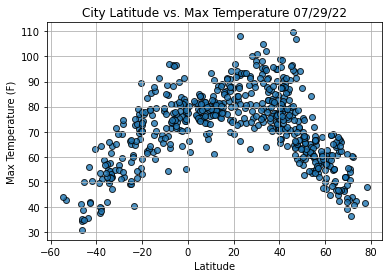

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

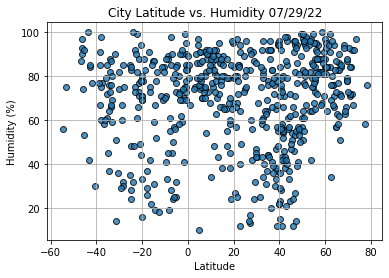

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

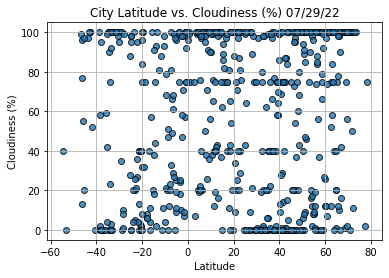

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

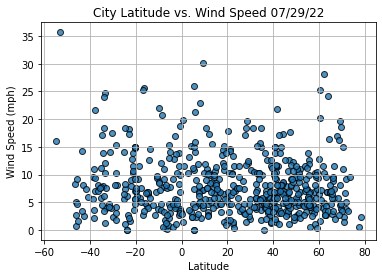

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()